In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns

C:\Users\damni\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
GoT = pd.read_csv('Game_of_Thrones_Script.csv')
GoT.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [ ]:
GoT['Spoken Word Count'] = GoT[]

In [40]:
GoT['Name'].value_counts()

tyrion lannister      1760
jon snow              1133
daenerys targaryen    1048
cersei lannister      1005
jaime lannister        945
                      ... 
member                   1
red priestess            1
tomard                   1
lord bolton              1
archers                  1
Name: Name, Length: 564, dtype: int64

In [47]:
GoT['Name'].unique()

array(['waymar royce', 'will', 'gared', 'royce', 'jon snow',
       'septa mordane', 'sansa stark', 'eddard stark', 'robb stark',
       'jonrobb', 'cassel', 'catelyn stark', 'bran stark',
       'theon greyjoy', 'jaime lannister', 'cersei lannister',
       'maester luwin', 'luwin', 'arya stark', 'robert baratheon',
       'tyrion lannister', 'ros', 'viserys', 'daenerys targaryen', 'maid',
       'illyrio', 'benjen', 'a voice', 'jorah mormont', 'khal drogo',
       'sandor clegane', 'doreah', 'irri', 'viserys targaryen',
       'joffrey lannister', 'myrcella baratheon', 'benjen stark',
       'assassin', 'jhiqui', 'rodrick cassel', 'mycah', 'soldier',
       'jory cassel', 'kings landing guard', 'varys', 'renly baratheon',
       'petyr baelish', 'grand maester pycelle', 'old nan', 'guard',
       'alliser thorne', 'jeor mormont', 'grenn', 'pyp', 'rast',
       'barristan selmy', 'lancel lannister', 'rakharo', 'yoren',
       'rhakaro', 'maester aemon', 'syrio forel', 'sam tarly',
   

In total, we have 564 different speaking characters throughout the series. However, upon close inspection, it seems this may number may be smaller due to an inconsistency with naming of speaking characters. The following are instances of the same character being named in different ways:
* maester luwin/luwin
* varys/lord varys
* grand maester pycelle/pycelle/gran maester pyrcelle/maester pycelle/maester pycell
* barristan selmy/barriston/ser barristan/barristan
* daenerys targaryen/deanerys targarian
* joffrey lanister/king joffrey
* kevan lannister/kevin/kevan 
* alliser thorne/ser alliser/alliser thorn/alliser/allister/alliser throne
* eddark stark/eddard stark
* rickon stark/rickon
* sam/sam tarly
* lord mormont/jeor mormont/jeor
* rodrick cassel/rodrik cassel/rodrik cassal/ser rodrick/rodrik
* edd/dolorous edd/dolorous/doloroud edd/dolrous edd
* renly/renly baratheon
* maryn trant/meryn
* lancell lannister/lancell
* petyr baelish/petyr
* mountain/mountian
* pyatt pree/pyat pree/pyattpree
* walder frey/walder
* sandor/sandor clegane
* lady olenna/olenna tyrell
* beric/beric dondarrion

In [41]:
correct_names = {'maester luwin':['maester luwin', 'luwin'],
                'varys': ['varys','lord varys'],
                'pycelle': ['grand maester pycelle', 'pycelle', 'gran maester pyrcelle', 'maester pycelle', 'maester pycell', 'pycell', 'pyelle', 'grand maester pyrcelle'],
                'barristan selmy': ['barristan selmy', 'barriston', 'ser barristan', 'barristan'],
                'daenerys targaryen': ['daenerys targaryen', 'deanerys targarian'],
                'joffrey lannister': ['joffrey lannister', 'king joffrey'],
                'kevan lannister': ['kevan lannister', 'kevin', 'kevan'],
                'alliser thorne': ['alliser thorne', 'ser alliser', 'alliser thorn', 'alliser', 'allister', 'alliser throne'],
                'eddard stark': ['eddard stark', 'eddark stark'],
                'rickon stark': ['rickon stark', 'rickon'],
                'sam tarly': ['sam tarly', 'sam'],
                'jeor mormont': ['jeor mormont', 'lord mormont', 'jeor'],
                'rodrik cassel': ['rodrik cassel', 'rodrick cassel', 'rodrik cassal', 'ser rodrick', 'rodrik'],
                "'dolorous' edd": ['edd', 'dolorous edd', 'dolorous', 'doloroud edd', 'dolrous edd', 'ed'],
                'renly baratheon': ['renly baratheon', 'renly'],
                'maryn trant': ['maryn trant', 'meryn', 'meryn trant'],
                'lancell lannister': ['lancell lannister', 'lancell', 'lancel'],
                'petyr baelish': ['petyr baelish', 'petyr'],
                'the mountain': ['mountain', 'mountian'],
                'pyat pree': ['pyat pree', 'pyatt pree', 'pyattpree'],
                'walder frey': ['walder frey', 'walder'],
                'sandor clegane': ['sandor clegane', 'sandor'],
                'olenna tyrell': ['olenna tyrell', 'lady olenna'],
                'beric dondarrion': ['beric dondarrion', 'beric']}

In retrospect, I created this dictionary backwards and the keys need to values and the values need to be keys in order for us to be able to apply it to our data.

In [42]:
fixed_dict = {}
for key, values in correct_names.items():
    for value in values:
        fixed_dict[value] = key

In [43]:
GoT['Character'] = GoT['Name'].map(fixed_dict)

In [44]:
GoT['Character'].fillna(GoT['Name'], inplace = True)

In [45]:
GoT['Character'].value_counts()

tyrion lannister      1760
jon snow              1133
daenerys targaryen    1049
cersei lannister      1005
jaime lannister        945
                      ... 
both                     1
unsullied captain        1
quick                    1
archers                  1
member                   1
Name: Character, Length: 520, dtype: int64

In [49]:
GoT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Release Date   23911 non-null  object
 1   Season         23911 non-null  object
 2   Episode        23911 non-null  object
 3   Episode Title  23911 non-null  object
 4   Name           23908 non-null  object
 5   Sentence       23911 non-null  object
 6   Character      23908 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [55]:
#drop duplicate name column and the three null values
GoT.dropna(inplace = True)
GoT.drop('Name', axis = 1, inplace = True)

In [56]:
GoT.head()

,Release Date,Season,Episode,Episode Title,Sentence,Character
0,2011-04-17,Season 1,Episode 1,Winter is Coming,What do you expect? They're savages. One lot s...,waymar royce
1,2011-04-17,Season 1,Episode 1,Winter is Coming,I've never seen wildlings do a thing like this...,will
2,2011-04-17,Season 1,Episode 1,Winter is Coming,How close did you get?,waymar royce
3,2011-04-17,Season 1,Episode 1,Winter is Coming,Close as any man would.,will
4,2011-04-17,Season 1,Episode 1,Winter is Coming,We should head back to the wall.,gared


In [57]:
# NExt lets look at the amount of words being spoken

In [66]:
complete_text = ' '.join(GoT['Sentence'])

1505661

In [68]:
sample = GoT['Sentence'][0]
sample

"What do you expect? They're savages. One lot steals a goat from another lot and before you know it, they're ripping each other to pieces."

We've successfully reduced the total number of speaking characters by 44!

In [59]:
from keras.preprocessing.text import Tokenizer

In [70]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([complete_text])


In [73]:
len(tokenizer.texts_to_sequences([sample])[0])

25

In [74]:
GoT['word_count'] = GoT['Sentence'].apply(lambda x: len(tokenizer.texts_to_sequences([x])[0]))

In [75]:
GoT.head()

,Release Date,Season,Episode,Episode Title,Sentence,Character,word_count
0,2011-04-17,Season 1,Episode 1,Winter is Coming,What do you expect? They're savages. One lot s...,waymar royce,25
1,2011-04-17,Season 1,Episode 1,Winter is Coming,I've never seen wildlings do a thing like this...,will,21
2,2011-04-17,Season 1,Episode 1,Winter is Coming,How close did you get?,waymar royce,5
3,2011-04-17,Season 1,Episode 1,Winter is Coming,Close as any man would.,will,5
4,2011-04-17,Season 1,Episode 1,Winter is Coming,We should head back to the wall.,gared,7


In [94]:
top_speakers = GoT.Character.value_counts().reset_index(name="count").query("count > 100")["index"]
top_speakers = list(top_speakers)
top_speakers

['tyrion lannister',
 'jon snow',
 'daenerys targaryen',
 'cersei lannister',
 'jaime lannister',
 'sansa stark',
 'arya stark',
 'sam tarly',
 'davos',
 'petyr baelish',
 'theon greyjoy',
 'bran stark',
 'bronn',
 'varys',
 'jorah mormont',
 'man',
 'tywin lannister',
 'brienne',
 'sandor clegane',
 'eddard stark',
 'robb stark',
 'stannis baratheon',
 'catelyn stark',
 'ramsay bolton',
 'margaery tyrell',
 'joffrey lannister',
 'melisandre',
 'shae',
 'gendry baratheon',
 'tormund',
 'gilly',
 'missandei',
 'olenna tyrell',
 'ygritte',
 'daario',
 'podrick',
 'sparrow',
 'yara greyjoy',
 'osha',
 'oberyn martell',
 'soldier',
 'pycelle',
 'tommen lannister',
 'robert baratheon',
 'qyburn',
 'grey worm',
 'jaqen hghar',
 'talisa',
 'thoros',
 'barristan selmy']

In [130]:
important_character_df = GoT[GoT['Character'].isin(top_speakers[:25])]
#this can be used on main df to get the max count for all characters, set this equal a variable and can be plottable
important_character_df.groupby('Character')['word_count'].max()

Character
arya stark            112
bran stark            104
brienne               218
bronn                  76
catelyn stark         134
cersei lannister      163
daenerys targaryen    129
davos                 118
eddard stark           81
jaime lannister       297
jon snow              140
jorah mormont          81
man                    80
margaery tyrell        70
petyr baelish         172
ramsay bolton          89
robb stark            103
sam tarly              95
sandor clegane         94
sansa stark           119
stannis baratheon     192
theon greyjoy          88
tyrion lannister      233
tywin lannister       111
varys                 187
Name: word_count, dtype: int64

In [86]:
GoT.describe()

,word_count
count,23908.000000
mean,12.043249
std,14.273522
min,1.000000
25%,4.000000
50%,8.000000
75%,15.000000
max,333.000000


In [124]:
GoT.loc[GoT['word_count'] == 333]

,Release Date,Season,Episode,Episode Title,Sentence,Character,word_count
6282,2012-05-20,Season 2,Episode 8,The Prince of Winterfell,"When I was twelve, my mother and father went t...",talisa,333


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

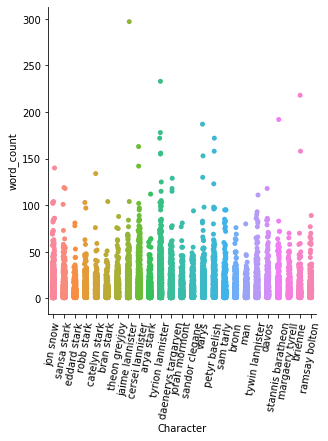

In [126]:
sns.catplot(data=important_character_df, x='Character', y='word_count')
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

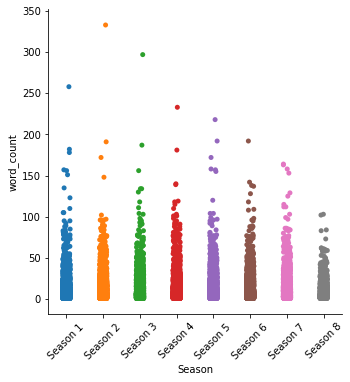

In [107]:
sns.catplot(data=GoT, x='Season', y='word_count')
plt.xticks(rotation=45)

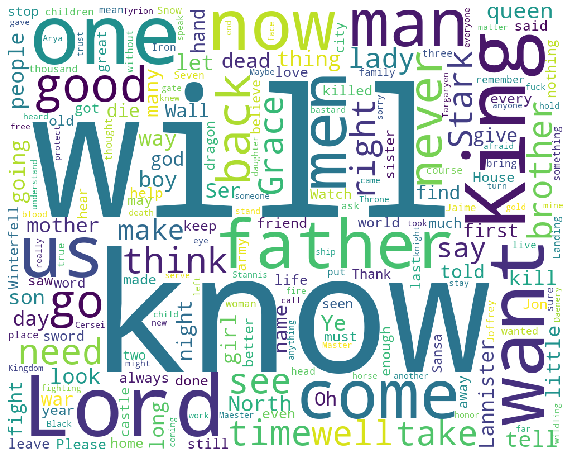

In [105]:
all_words = WordCloud(background_color = 'White', collocations=False, height=800, width=1000)
all_words.generate(complete_text)
plt.figure(figsize = (10, 10))
plt.imshow(all_words) 
plt.axis("off")
plt.show()

In [159]:
filter1 = 'Season 2'
filter2 = None

In [160]:
dfs = GoT[GoT['Season'] == filter1]

In [161]:
if filter2:
    dfe = dfs[dfs['Episode'] == filter2]
else:
    dfe = dfs

In [162]:
dfe

,Release Date,Season,Episode,Episode Title,Sentence,Character,word_count
3179,2012-04-01,Season 2,Episode 1,The North Remembers,"Well struck… Well struck, Dog.",joffrey lannister,5
3180,2012-04-01,Season 2,Episode 1,The North Remembers,Did you like that?,joffrey lannister,4
3181,2012-04-01,Season 2,Episode 1,The North Remembers,"It was well struck, Your Grace.",sansa stark,6
3182,2012-04-01,Season 2,Episode 1,The North Remembers,I already said it was well struck.,joffrey lannister,7
3183,2012-04-01,Season 2,Episode 1,The North Remembers,"Yes, Your Grace.",sansa stark,3
...,...,...,...,...,...,...,...
7088,2012-06-03,Season 2,Episode 10,Valar Morghulis,Three blasts?,grenn,2
7089,2012-06-03,Season 2,Episode 10,Valar Morghulis,Run!,'dolorous' edd,1
7090,2012-06-03,Season 2,Episode 10,Valar Morghulis,Wait! Wait for me!,sam tarly,4
7091,2012-06-03,Season 2,Episode 10,Valar Morghulis,Grenn!,sam tarly,1


In [182]:
lines_df = dfe.set_index(['Character', 'Sentence']).count(level='Character')
lines_df.sort_values(by=['Episode'], inplace = True, ascending = False)

In [163]:
import plotly.graph_objects as go

In [184]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = lines_df.index[:25],
    y = lines_df['Episode']))

In [168]:
dfe['Character'].value_counts()

tyrion lannister      347
cersei lannister      181
theon greyjoy         175
daenerys targaryen    135
robb stark            129
                     ... 
quent                   1
ser rodrik              1
armory                  1
colen                   1
ironborn                1
Name: Character, Length: 140, dtype: int64

In [37]:
seasons = GoT['Season'].unique()

In [38]:
df_name = 'GoT_'
season_num = 1
i = 0
df_names = []
for season in seasons:
    df_names.append(df_name+str(season_num))
    df_names[i] = GoT[GoT['Season'] == season]
    season_num += 1
    i+=1

In [40]:
df_names

[     Release Date    Season     Episode     Episode Title                Name  \
 0      2011-04-17  Season 1   Episode 1  Winter is Coming        waymar royce   
 1      2011-04-17  Season 1   Episode 1  Winter is Coming                will   
 2      2011-04-17  Season 1   Episode 1  Winter is Coming        waymar royce   
 3      2011-04-17  Season 1   Episode 1  Winter is Coming                will   
 4      2011-04-17  Season 1   Episode 1  Winter is Coming               gared   
 ...           ...       ...         ...               ...                 ...   
 3174   2011-06-19  Season 1  Episode 10    Fire and Blood  daenerys targaryen   
 3175   2011-06-19  Season 1  Episode 10    Fire and Blood  daenerys targaryen   
 3176   2011-06-19  Season 1  Episode 10    Fire and Blood      mirri maz duur   
 3177   2011-06-19  Season 1  Episode 10    Fire and Blood  daenerys targaryen   
 3178   2011-06-19  Season 1  Episode 10    Fire and Blood       jorah mormont   
 
              

In [36]:
df_names[6]['Name'].value_counts()

jon snow              243
daenerys targaryen    191
tyrion lannister      188
jaime lannister       172
cersei lannister      162
                     ... 
lyanna mormont          1
yohn royce              1
archers                 1
unsullied               1
archmaester             1
Name: Name, Length: 73, dtype: int64

In [48]:
 GoT.Character.value_counts().reset_index(name="count").query("count < 5")["index"]

278         young benjen
279                jacks
280           frey guard
281                vicky
282               martha
             ...        
515                 both
516    unsullied captain
517                quick
518              archers
519               member
Name: index, Length: 242, dtype: object